**Bag of words**

In [55]:
class Category:
    BOOKS = 'BOOKS'
    CLOTHING = 'CLOTHING'

train_x = ["i love the book","this is a great book","the fit is great","I love the shoes"]
train_y = [Category.BOOKS,Category.BOOKS,Category.CLOTHING,Category.CLOTHING]

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2)) 
tain_x_vectors = vectorizer.fit_transform(train_x)

print (vectorizer.get_feature_names_out())

print(tain_x_vectors.toarray())


['book' 'fit' 'fit is' 'great' 'great book' 'is' 'is great' 'love'
 'love the' 'shoes' 'the' 'the book' 'the fit' 'the shoes' 'this'
 'this is']
[[1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0]
 [1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1]
 [0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0]]


In [41]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True) 
tain_x_vectors = vectorizer.fit_transform(train_x)

print (vectorizer.get_feature_names_out())

print(tain_x_vectors.toarray())

['book' 'fit' 'great' 'is' 'love' 'shoes' 'the' 'this']
[[1 0 0 0 1 0 1 0]
 [1 0 1 1 0 0 0 1]
 [0 1 1 1 0 0 1 0]
 [0 0 0 0 1 1 1 0]]


In [42]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(tain_x_vectors,train_y)

SVC(kernel='linear')

In [43]:
test_x = vectorizer.transform(['i like the book'])

clf_svm.predict(test_x)

array(['BOOKS'], dtype='<U8')

In [44]:
text_x = vectorizer.transform(['shoes are not bad'])

clf_svm.predict(text_x)

array(['CLOTHING'], dtype='<U8')

In [47]:
text_x = vectorizer.transform(['i love the books'])

clf_svm.predict(text_x)

array(['CLOTHING'], dtype='<U8')

that's one downfall of bag of words it's great on staff it's trained on but if it hasn't seen a word then it just fails miserably

**Word Vectors**

Capture the semantic meaning of a word in a vector
Convert text into a numerical vector that captures some of that semantic meaning in the vector space that we're mapping this piece of text to

In [48]:
!pip install spacy
!python -m spacy download en_core_web_md

Defaulting to user installation because normal site-packages is not writeable
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
    --------------------------------------- 0.3/13.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.9 MB 1.6 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/13.9 MB 1.4 MB/s eta 0:00:10
   --- ------------------------------------ 1.0/13.9 MB 1.2 MB/s eta 0:00:12
   --- ------------------------------------ 1.3/13.9 MB 1.2 MB/s eta 0:00:11
   ---- ----------------------------------- 1.6/13.9 MB 1.3 MB/s eta 0:00:10
   ------ --------------------------------- 2.1/13.9 MB 1.4 MB/s eta 0:00:09
   ------ --------------------------------- 2.4/13.9 MB 1.4 MB/s eta 0:00:09
   ------- -------------------------------- 2.6/13.9 MB 1.4 MB/s eta 0:00:08
   --------- ------------------------------ 3.1/13.9 MB 1.5 MB/s eta 0:00:08
   --------- -----


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.3/33.5 MB ? eta -:--:--
      --------------------------------------- 0.5/33.5 MB 1.6 MB/s eta 0:00:21
      --------------------------------------- 0.8/33.5 MB 1.7 MB/s eta 0:00:20
     - -------------------------------------- 1.3/33.5 MB 1.6 MB/s eta 0:00:20
     - -------------------------------------- 1.6/33.5 MB 1.7 MB/s eta 0:00:20
     -- ------------------------------------- 1.8/33.5 MB 1.6 MB/s eta 0:00:20
     -- ------------------------------------- 2.4/33.5 MB 1.6 MB/s eta 0:00:20
     --- ------------------------------------ 2.6/33.5 MB 1.6 MB/s eta 0:00:19
     --- ------------------------------------ 2.9/33.5 MB 1.6 MB/s eta 0:00:19
     --- ------------------------------------ 3.1/33.5 MB 1.6 MB/s eta 0:00:19
     ---- ----------------------------------- 3.4/33.5 MB 1.6 MB/s 


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
import spacy

In [51]:
nlp = spacy.load('en_core_web_md')

In [56]:
print(train_x)

['i love the book', 'this is a great book', 'the fit is great', 'I love the shoes']


In [75]:
docs= [nlp(text) for text in train_x]
print(docs[0].vector)

[-7.33089983e-01 -5.24749886e-03 -2.35488251e-01  1.59274936e-02
  9.66347754e-02  1.56278491e-01  1.38615012e-01 -1.82292491e-01
  8.84527490e-02  1.54077005e+00 -2.41762251e-01 -8.96672532e-02
  1.74057245e-01  3.10127772e-02  4.62116897e-02 -5.05267493e-02
 -1.48660004e-01  1.03792381e+00 -1.71565011e-01 -6.28000051e-02
  1.03982493e-01  1.28997505e-01  1.35554761e-01 -2.06535250e-01
 -2.21828252e-01 -1.54980987e-01 -2.25717485e-01 -2.63060927e-01
  2.91349851e-02  9.59425047e-02 -2.11517513e-02  3.45300019e-01
 -1.88805014e-01  1.19102523e-02  1.82815492e-01  1.35538995e-01
 -1.14783749e-01  2.49261260e-01 -1.00740008e-01  6.52624816e-02
 -1.29889250e-01  1.79949999e-02 -1.20909005e-01 -2.06174999e-02
  1.49652511e-01  1.26080498e-01  4.98107485e-02  1.36212513e-01
 -6.19465038e-02  1.98888257e-01 -1.23281501e-01  9.30762440e-02
 -8.31630006e-02 -1.11451503e-02  3.28723229e-02 -1.49444744e-01
 -3.78984734e-02 -1.56752497e-01 -1.67660996e-01 -1.64857253e-01
 -1.43127844e-01 -1.18127

In [76]:
train_x_word_vectors = [x.vector for x in docs]

In [77]:
clf_svm_wv = svm.SVC(kernel='linear')
clf_svm_wv.fit(train_x_word_vectors,train_y)

SVC(kernel='linear')

In [78]:
test_x = ['i love the book']
test_docs = [nlp(text) for text in test_x]
test_x_word_vectors = [x.vector for x in test_docs]
clf_svm_wv.predict(test_x_word_vectors)

array(['BOOKS'], dtype='<U8')

In [80]:
test_x = ['i love story']
test_docs = [nlp(text) for text in test_x]
test_x_word_vectors = [x.vector for x in test_docs]
clf_svm_wv.predict(test_x_word_vectors)

array(['BOOKS'], dtype='<U8')

In [84]:
test_x = ['i love the earings']
test_docs = [nlp(text) for text in test_x]
test_x_word_vectors = [x.vector for x in test_docs]
clf_svm_wv.predict(test_x_word_vectors)

array(['CLOTHING'], dtype='<U8')

word vector is gonna be the same for words that s written the same but means diff things

**Regexes**


Pattern Matching of strings in python


Password checkers, phone numbers, emails...

In [ ]:
import re

regexp = re.compile(r"^ab[^\s]*cd$")

phrases =['abcd','xxx','abxxxcd','ab cd']

matches=[]
for phrase in phrases:
    if re.match(regexp,phrase):# we can use re.search too
        matches.append(phrase)

print(matches)

['abcd', 'abxxxcd']


In [97]:
#hard coded rule
regexp = re.compile(r"\bread\b|\bstory\b|book")

phrases= ['I liked that story','I hate history','the car treaded up the hill','i like the book', 'this hat is nice']
matches=[]
for phrase in phrases:
    if re.search(regexp,phrase):
        matches.append(phrase)
    
print(matches)

['I liked that story', 'i like the book']


**Stemming & Lemmatization**

Techniques to normalize text

reading -> read

Books -> book

Stories ->

Stori for stemming story for lemmatizing (using a dictonary to check that the output is an actual words)

In [99]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 1.6 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.6 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [106]:
import nltk 

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tassili\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tassili\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tassili\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tassili\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [107]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

phrase = 'reading the books'
words = word_tokenize(phrase)

stemmed_words = []
for word in words:
    stemmed_words.append(stemmer.stem(word))

' '.join(stemmed_words)


'read the book'

In [110]:
phrase = "he doesn't like the stories."
words = word_tokenize(phrase)
print(words)

stemmed_words = []
for word in words:
    stemmed_words.append(stemmer.stem(word))

' '.join(stemmed_words)

['he', 'does', "n't", 'like', 'the', 'stories', '.']


"he doe n't like the stori ."

that s an example the prbs we have in this technique:

it's not guaranteed to have a word and sometime you'll get collisions on two words that aren't necessarily similar

these are some drawbacks

an other point we need to strip out puctuation  or handle it a little bit separately 

*Lemmatization*

In [116]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

phrase = 'reading the books'
words = word_tokenize(phrase)

lemmatized_words = []
for word in words:
    lemmatized_words.append(lemmatizer.lemmatize(word,pos='v'))

' '.join(lemmatized_words)

'read the book'

**Stopwords Removal**

The set of most common words in english(this,that,he,it) 

they don't add much meaning to our sentences

In [120]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words= stopwords.words('english')
print(stop_words) 
print(len(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [122]:
phrase= "This is an example we are using to show the impact of stopwords removal now"

words= word_tokenize(phrase)
stripped_phrase =[]
for word in words:
    if word not in stop_words:
       stripped_phrase.append(word)

" ".join(stripped_phrase)

'This example using show impact stopwords removal'

**Various other techniques (spell correction,sentiment, & pos tagging)**

TextBlob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, and more.

In [124]:
!pip install -U textblob
!python -m textblob.download_corpora

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   -------------------------------------- 624.3/624.3 kB 893.3 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\tassili\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tassili\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tassili\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\tassili\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\tassili\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\tassili\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [136]:
from textblob import TextBlob

phrase= 'hereee is an exmplee'

tb_phrase = TextBlob(phrase)
corrected_phrase=tb_phrase.correct()

In [137]:
corrected_phrase.tags

[('here', 'RB'), ('is', 'VBZ'), ('an', 'DT'), ('example', 'NN')]

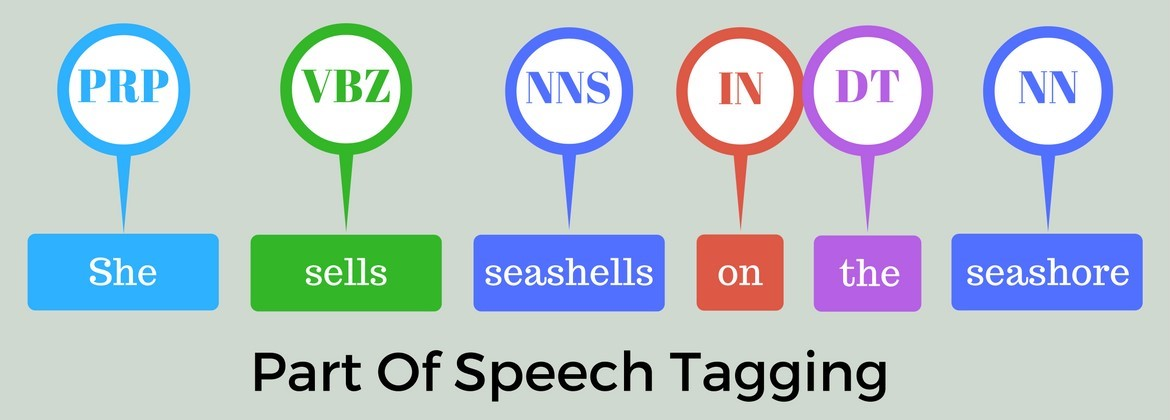

- RB:adverb
- DT:determiner
- VB:verb
- VBD:verb,past tense took
- VBG:verb,gerund/present participle taking
- VBN:verb, past participle taken
- VBP:verb,sing,present,non-3d take
- NN:noun, singlar
- NNS:noun plural
- NNP:proper noun
- PRP:personal pronoun I,he,she
- VBZ:verb, 3rd person sing present takes
- IN:preposition/subordinating conjunction
- FW:foreign word
- CC:coordinating conjunction
- CD:cardinal digit
- EX:existential there(like:'ther is')
- JJ:adjective 'big'
- JJR:adjective,comparative 'bigger'
- JJS: adj,supperlative 'biggest'


In [150]:
phrase='I loved the books'
tb_phrase = TextBlob(phrase)
print(phrase,'->',tb_phrase.sentiment)
phrase='The book was great'
tb_phrase = TextBlob(phrase)
print(phrase,'->',tb_phrase.sentiment)
tb_phrase = TextBlob('the book was awfully great')
print('the book was awfully great->',tb_phrase.sentiment)
tb_phrase = TextBlob('the book was awful')
print('the book was awful->',tb_phrase.sentiment)

I loved the books -> Sentiment(polarity=0.7, subjectivity=0.8)
The book was great -> Sentiment(polarity=0.8, subjectivity=0.75)
the book was awfully great-> Sentiment(polarity=0.8, subjectivity=0.75)
the book was awful-> Sentiment(polarity=-1.0, subjectivity=1.0)


**Reccurent Neural Networks**

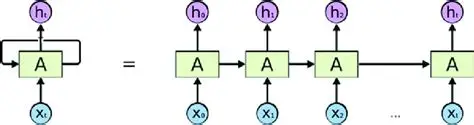

A Recurrent Neural Network processes input data sequentially. For example, when the network receives a word, it generates a hidden state that captures contextual information about that input. This hidden state is then passed not only to the next layer but also fed back into the network, allowing it to retain memory of previous inputs. This recurrent connection enables the model to learn temporal dependencies and patterns across sequences, making RNNs especially effective for tasks such as natural language processing, speech recognition, and time-series prediction

Drawbacks:
- Longer dependencies don't always perform well
- Sequential nature of RNNs make it tough to parallelize and effectively use modern GPUS